In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
#from keras.preprocessing import image
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
# /content/drive/MyDrive/CV_Project
#!unzip /content/drive/MyDrive/yoloimages.zip

In [ ]:
!cd /content/drive/MyDrive



In [ ]:
!ls

drive  README.dataset.txt  README.roboflow.txt	sample_data  test  train  valid


In [ ]:
train = pd.read_csv('train/_classes.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,filename,Blue Box,Orange Cone,Red Sphere
0,File-1027_png.rf.bec32c29a030669f0c924fa98230c...,1,0,1
1,File-956_png.rf.bf24195b32a4937fb389e2b0ba6323...,1,0,0
2,img_001090_png.rf.be91586e810428f14f189e6e4e60...,0,1,0
3,File-2681_png.rf.be4b6d0e9bb1a5d68b6a75cdfec6c...,0,0,1
4,File-2022_png.rf.be38e77b7b356f6a76120ef04eb9e...,0,1,0


In [ ]:
test = pd.read_csv('test/_classes.csv')    # reading the csv file
test.head()  
valid = pd.read_csv('valid/_classes.csv')    # reading the csv file
valid.head()  

,filename,Blue Box,Orange Cone,Red Sphere
0,File-977_png.rf.692a5426c342cbc2c56345e65abbd6...,0,0,1
1,00041_png.rf.67e5c366957896f0f4559fb6da6ba6d7.jpg,0,0,1
2,File-1521_png.rf.6a67987597666f0aa14ca00320a2f...,1,0,1
3,File-393_png.rf.68f9922a699e9c359012e58200b7b5...,1,0,0
4,File-579_png.rf.6c6dc880c379bb3c33cb93df1f33d2...,0,1,0


In [ ]:
train.columns


Index(['filename', ' Blue Box', ' Orange Cone', ' Red Sphere'], dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['filename'][i],target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 2014/2014 [00:30<00:00, 65.15it/s]


In [ ]:
X.shape

(2014, 200, 200, 3)

In [ ]:
class_names = ['Blue Box', ' Orange Cone', ' Red Sphere']

In [ ]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['filename'][i],target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
Y = np.array(test_image)

100%|██████████| 285/285 [00:01<00:00, 155.61it/s]


In [ ]:
valid

,filename,Blue Box,Orange Cone,Red Sphere
0,File-977_png.rf.692a5426c342cbc2c56345e65abbd6...,0,0,1
1,00041_png.rf.67e5c366957896f0f4559fb6da6ba6d7.jpg,0,0,1
2,File-1521_png.rf.6a67987597666f0aa14ca00320a2f...,1,0,1
3,File-393_png.rf.68f9922a699e9c359012e58200b7b5...,1,0,0
4,File-579_png.rf.6c6dc880c379bb3c33cb93df1f33d2...,0,1,0
...,...,...,...,...
558,File-1784_png.rf.61547f8fe6e71c3e40bfd9957a628...,0,0,1
559,img_000664_png.rf.5ff01005064d8bfd2df5c187c610...,0,0,1
560,File-451_png.rf.606dd3adfd2350011b8b55a7809d51...,0,0,1
561,File-1985_png.rf.607b244c7207d2c437cc53f6ba64c...,0,1,0


In [ ]:
valid_image = []
for i in tqdm(range(valid.shape[0])):
    img = image.load_img('valid/'+valid['filename'][i],target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    valid_image.append(img)
Z = np.array(valid_image)

100%|██████████| 563/563 [00:05<00:00, 110.57it/s]


In [ ]:
import numpy as np

In [ ]:
train_labels = np.array(train.drop(['filename'],axis=1))

In [ ]:
test_labels = np.array(test.drop(['filename'],axis=1))


In [ ]:
valid_labels = np.array(valid.drop(['filename'],axis=1))

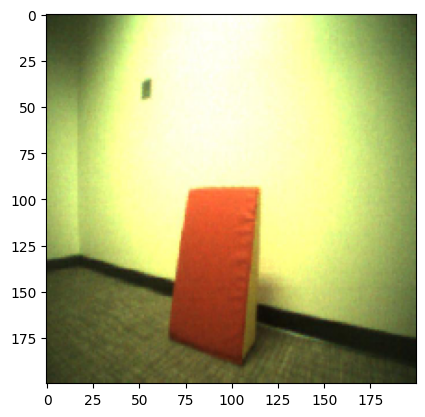

In [ ]:
plt.imshow(X[2])

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 32)       

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, train_labels, random_state=42, test_size=0.1)

In [ ]:
model.fit(X, train_labels, epochs=100, validation_data=(Y, test_labels), batch_size=16)

Epoch 1/100
126/126 [==============================] - 7s 30ms/step - loss: 0.6674 - accuracy: 0.3575 - val_loss: 0.5872 - val_accuracy: 0.5298
Epoch 2/100
126/126 [==============================] - 3s 22ms/step - loss: 0.5812 - accuracy: 0.5318 - val_loss: 0.5367 - val_accuracy: 0.5333
Epoch 3/100
126/126 [==============================] - 3s 23ms/step - loss: 0.5490 - accuracy: 0.5367 - val_loss: 0.5211 - val_accuracy: 0.5298
Epoch 4/100
126/126 [==============================] - 3s 22ms/step - loss: 0.5396 - accuracy: 0.5338 - val_loss: 0.5198 - val_accuracy: 0.5333
Epoch 5/100
126/126 [==============================] - 3s 21ms/step - loss: 0.5332 - accuracy: 0.5204 - val_loss: 0.5164 - val_accuracy: 0.5333
Epoch 6/100
126/126 [==============================] - 3s 21ms/step - loss: 0.5308 - accuracy: 0.5074 - val_loss: 0.5154 - val_accuracy: 0.5333
Epoch 7/100
126/126 [==============================] - 3s 22ms/step - loss: 0.5265 - accuracy: 0.5189 - val_loss: 0.5200 - val_accuracy:

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
## Fashion_mnist model

model_new = Sequential()
model_new.add(Conv2D(16,kernel_size=3,padding='same',activation='relu',input_shape=(200,200,3)))
model_new.add(MaxPooling2D(2,padding='same'))
model_new.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
model_new.add(MaxPooling2D(2,padding='same'))
model_new.add(Flatten())
model_new.add(Dense(30,activation='relu'))
model_new.add(Dense(10,activation='relu'))
model_new.add(Dense(3,activation='softmax'))

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 80000)             0         
                                                                 
 dense_3 (Dense)             (None, 30)               

In [ ]:
model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_new.fit(X, train_labels, epochs=100, validation_data=(Y, test_labels), batch_size=16)

Epoch 1/100
126/126 [==============================] - 15s 21ms/step - loss: 0.4872 - accuracy: 0.5432 - val_loss: 0.2685 - val_accuracy: 0.7684
Epoch 2/100
126/126 [==============================] - 2s 14ms/step - loss: 0.1759 - accuracy: 0.7761 - val_loss: 0.0978 - val_accuracy: 0.8351
Epoch 3/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0651 - accuracy: 0.8143 - val_loss: 0.0530 - val_accuracy: 0.8316
Epoch 4/100
126/126 [==============================] - 2s 15ms/step - loss: 0.0446 - accuracy: 0.8203 - val_loss: 0.0615 - val_accuracy: 0.8632
Epoch 5/100
126/126 [==============================] - 2s 16ms/step - loss: 0.0319 - accuracy: 0.8247 - val_loss: 0.0344 - val_accuracy: 0.8632
Epoch 6/100
126/126 [==============================] - 2s 16ms/step - loss: 0.0245 - accuracy: 0.8257 - val_loss: 0.0294 - val_accuracy: 0.8561
Epoch 7/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0192 - accuracy: 0.8381 - val_loss: 0.0429 - val_accuracy

In [ ]:
from sklearn.metrics import confusion_matrix

18/18 - 1s - loss: 0.3767 - accuracy: 0.8757 - 841ms/epoch - 47ms/step

Test loss: 0.3766842782497406

Test accuracy: 0.875666081905365
18/18 [==============================] - 0s 12ms/step


,Blue Box,Orange Cone,Red Sphere
Blue Box,222,4,29
Orange Cone,0,131,2
Red Sphere,1,2,172


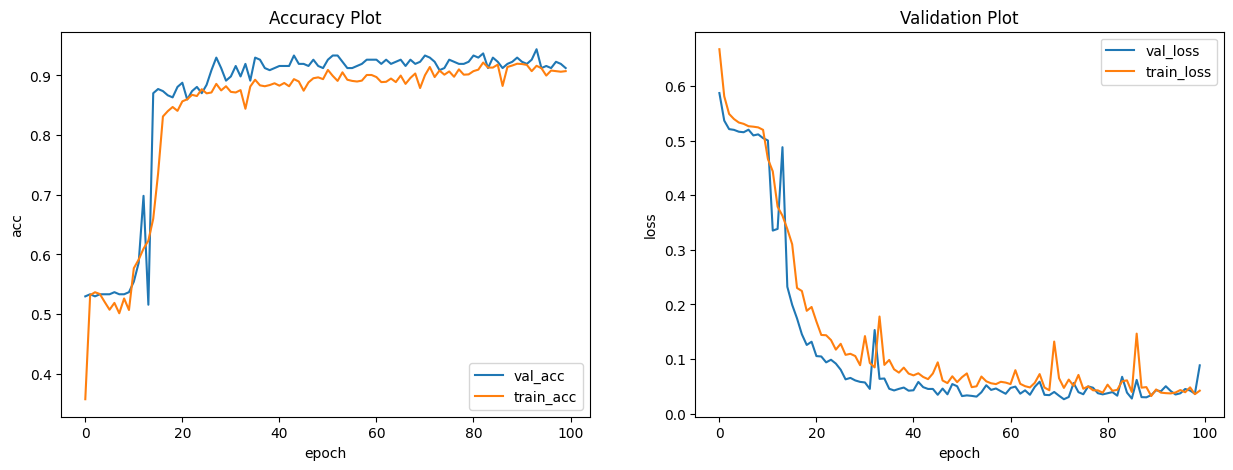

In [ ]:
val_acc_logs=model.history.history['val_accuracy']
val_loss_logs=model.history.history['val_loss']


acc_logs=model.history.history['accuracy']
loss_logs=model.history.history['loss']

fig=plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1)
_ = plt.plot(val_acc_logs),plt.plot(acc_logs), plt.xlabel('epoch'), plt.ylabel('acc'),plt.legend(['val_acc','train_acc']),plt.title('Accuracy Plot')
fig.add_subplot(1, 2, 2)
_ = plt.plot(val_loss_logs),plt.plot(loss_logs), plt.xlabel('epoch'), plt.ylabel('loss'),plt.legend(['val_loss','train_loss']),plt.title('Validation Plot')

fig.savefig('full_figure.png')

test_loss, test_acc = model.evaluate(Z,  valid_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
rounded_labels=np.argmax(valid_labels, axis=1)
# rounded_labels[1]

result=model.predict(Z)
result=np.argmax(result,axis=1)
conf_mat=confusion_matrix(rounded_labels, result)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(rounded_labels, rounded_predictions)
# cm
indexes=pd.Index(class_names)
Table=pd.DataFrame(conf_mat,index=indexes,columns=indexes)
Table

In [ ]:
model.save("light_model")

In [ ]:
!zip -r /content/light_model.zip /content/light_model

  adding: content/light_model/ (stored 0%)
  adding: content/light_model/assets/ (stored 0%)
  adding: content/light_model/keras_metadata.pb (deflated 93%)
  adding: content/light_model/fingerprint.pb (stored 0%)
  adding: content/light_model/variables/ (stored 0%)
  adding: content/light_model/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/light_model/variables/variables.index (deflated 66%)
  adding: content/light_model/saved_model.pb (deflated 89%)


In [ ]:
from google.colab import files
files.download("/content/light_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('light_model.h5') 